## Train model

In [1]:
import yaml


config = None
with open("train.yaml", 'rt') as f:
    config = yaml.safe_load(f.read())

config

{'model': {'type': 'cnn_resnext', 'preprocessing': 'imagenet'},
 'dataset': {'path': 'data/train.csv',
  'val_share': 0.1,
  'train_batch': 16,
  'val_batch': 128},
 'optimizer': {'type': 'SGD',
  'pars': {'lr': 0.001, 'momentum': 0.9},
  'scheduler': {'type': 'ExponentialLR', 'pars': {'gamma': 0.9}}},
 'evaluation': {'metrics': ['accuracy_score', 'f1_score', 'confusion_matrix'],
  'period': 400},
 'autosave': {'period': 1, 'path': 'checkpoints'},
 'logs': {'path': 'logs'},
 'scheduler': {'epochs': 6}}

In [2]:
import torchvision

from dataloader import MNISTDataset
from digits_recognizer import build_model
from preprocessor import build_preprocessor
from train import *

In [3]:
model = build_model(config['model']['type'])
preprocessor = build_preprocessor(config['model']['preprocessing'])
img_transform = torchvision.transforms.Compose([
    preprocessor,
])

dataset = MNISTDataset(config['dataset']['path'], transform=img_transform)
val_target_size = int(config['dataset']['val_share'] * len(dataset))
train_dataset, val_dataset = random_split(dataset, [len(dataset) - val_target_size, val_target_size])
train_dataloader = DataLoader(train_dataset, batch_size=config['dataset']['train_batch'], shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=config['dataset']['val_batch'], shuffle=True)

optimizer = build_optimizer(model, config['optimizer'])
scheduler = build_scheduler(optimizer, config['optimizer']['scheduler'])
loss_function = torch.nn.CrossEntropyLoss()
train_metrics = {
    'accuracy': accuracy_evaluator,
}
val_metrics = {
    'accuracy': accuracy_evaluator,
    'conf_matrix': cm_evaluator,
}

#### Inspect the data

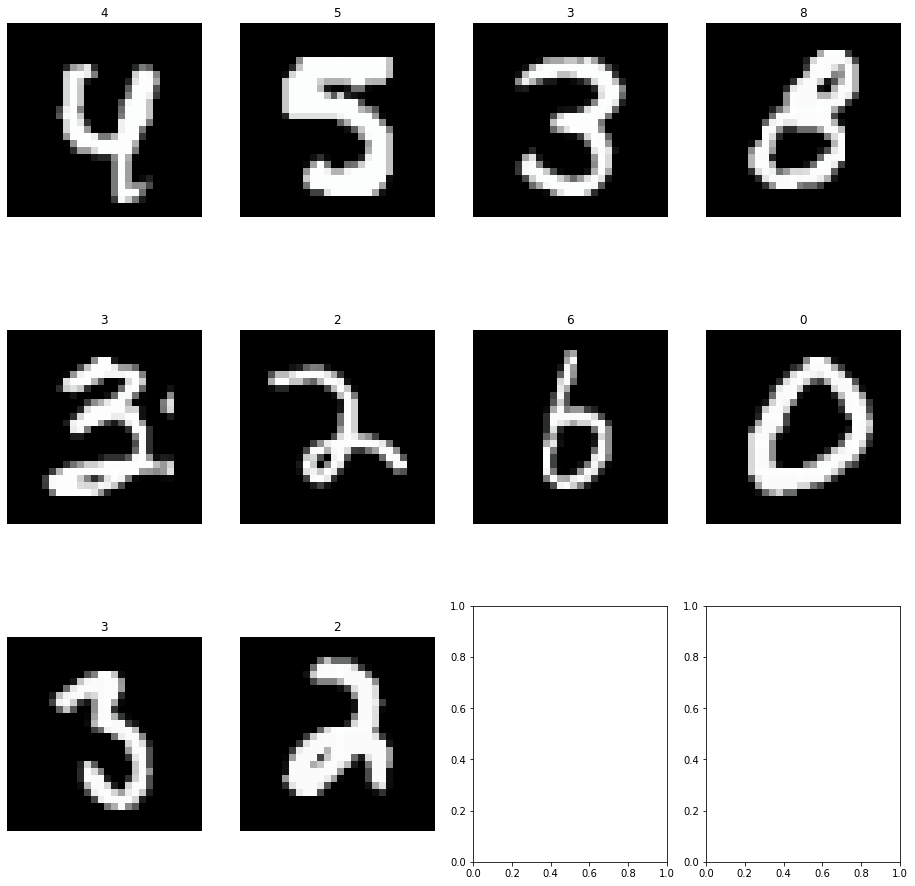

In [4]:
from utils import plot_samples


def process_sample(sample):
    tensor, label = sample
    return preprocessor.restore(tensor), label


images = [process_sample(train_dataset[i]) for i in range(10)]
plot_samples(images)

Platform: Darwin
Release: 21.5.0
MPS available: True
CUDA available: False
Selected device: mps
Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─ChannelOrderValidator: 2-1        --
|    └─Conv2d: 2-2                       9,408
|    └─BatchNorm2d: 2-3                  128
|    └─ReLU: 2-4                         --
|    └─MaxPool2d: 2-5                    --
|    └─Sequential: 2-6                   --
|    |    └─Bottleneck: 3-1              63,488
|    |    └─Bottleneck: 3-2              71,168
|    |    └─Bottleneck: 3-3              71,168
|    └─Sequential: 2-7                   --
|    |    └─Bottleneck: 3-4              349,184
|    |    └─Bottleneck: 3-5              282,624
|    |    └─Bottleneck: 3-6              282,624
|    |    └─Bottleneck: 3-7              282,624
|    └─Sequential: 2-8                   --
|    |    └─Bottleneck: 3-8              1,390,592
|    |    └─Bottleneck: 3-9              1,126,400
|    |    └─B

Epoch 2/6 Iteration 2399/14178 Loss 1.4635587930679321 :  17%|█▋        | 2400/14178 [07:08<40:35,  4.84it/s]  /Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predicted = np.asarray(predicted).reshape([-1, 10])
/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target = np.asarray(target).reshape([-1])


Error: Got an unhandled exception during iteration 2400
Traceback (most recent call last):
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 126, in train
    evaluate(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 81, in evaluate
    value = metric_callback(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 176, in accuracy_evaluator
    predicted = np.argmax(predicted, axis=-1).flatten()
  File "<__array_function__ internals>", line 180, in argmax
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 1216, in argmax
    return _wrapfunc(a, 'argmax', axis=axis, out=out, **kwds)
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
ValueError

Epoch 3/6 Iteration 4799/14178 Loss 1.4614272117614746 :  34%|███▍      | 4800/14178 [37:35<25:54,  6.03it/s]     /Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predicted = np.asarray(predicted).reshape([-1, 10])
/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target = np.asarray(target).reshape([-1])


Error: Got an unhandled exception during iteration 4800
Traceback (most recent call last):
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 126, in train
    evaluate(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 81, in evaluate
    value = metric_callback(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 176, in accuracy_evaluator
    predicted = np.argmax(predicted, axis=-1).flatten()
  File "<__array_function__ internals>", line 180, in argmax
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 1216, in argmax
    return _wrapfunc(a, 'argmax', axis=axis, out=out, **kwds)
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
ValueError

Epoch 4/6 Iteration 7199/14178 Loss 1.4752392768859863 :  51%|█████     | 7200/14178 [44:49<20:49,  5.58it/s]  /Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/utils.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (6,6))
/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predicted = np.asarray(predicted).reshape([-1, 10])
/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:79: VisibleDeprecationWarning: Cre

Error: Got an unhandled exception during iteration 7200
Traceback (most recent call last):
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 126, in train
    evaluate(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 81, in evaluate
    value = metric_callback(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 176, in accuracy_evaluator
    predicted = np.argmax(predicted, axis=-1).flatten()
  File "<__array_function__ internals>", line 180, in argmax
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 1216, in argmax
    return _wrapfunc(a, 'argmax', axis=axis, out=out, **kwds)
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
ValueError

Epoch 5/6 Iteration 9599/14178 Loss 1.4613540172576904 :  68%|██████▊   | 9600/14178 [54:01<20:16,  3.76it/s]/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predicted = np.asarray(predicted).reshape([-1, 10])
/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target = np.asarray(target).reshape([-1])


Error: Got an unhandled exception during iteration 9600
Traceback (most recent call last):
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 126, in train
    evaluate(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 81, in evaluate
    value = metric_callback(
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 176, in accuracy_evaluator
    predicted = np.argmax(predicted, axis=-1).flatten()
  File "<__array_function__ internals>", line 180, in argmax
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 1216, in argmax
    return _wrapfunc(a, 'argmax', axis=axis, out=out, **kwds)
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
ValueError

Epoch 5/6 Iteration 11599/14178 Loss 1.4613960981369019 :  82%|████████▏ | 11600/14178 [1:02:58<10:59,  3.91it/s]

Error: Got an unhandled exception during iteration 11600
Traceback (most recent call last):
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/train.py", line 115, in train
    inputs, labels = next(val_iter)
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 652, in __next__
    data = self._next_data()
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 689, in _next_data
    index = self._next_index()  # may raise StopIteration
  File "/Users/iolkhovsky/Documents/repos/kaggle_sandbox/digits_recognizer/venv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 642, in _next_index
    return next(self._sampler_iter)  # may raise StopIteration
StopIteration

Error: Got an unhandled exception during iteration 11600
Traceback (most recent call last):
  File "/Users/i

Epoch 5/6 Iteration 11599/14178 Loss 1.4613960981369019 :  82%|████████▏ | 11600/14178 [1:06:21<14:44,  2.91it/s]


KeyboardInterrupt: 

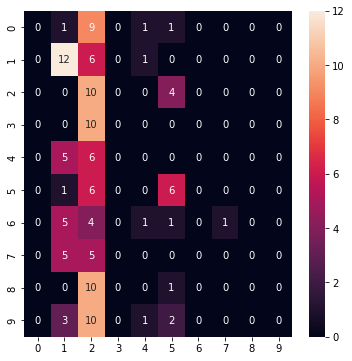

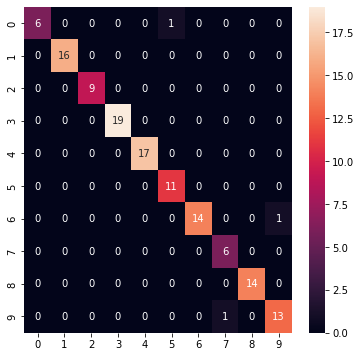

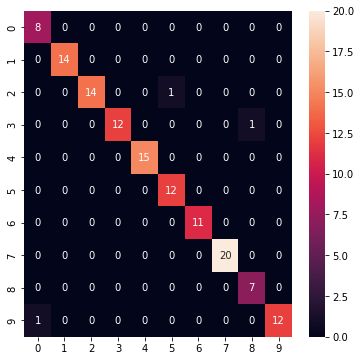

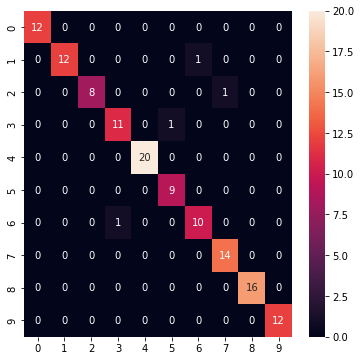

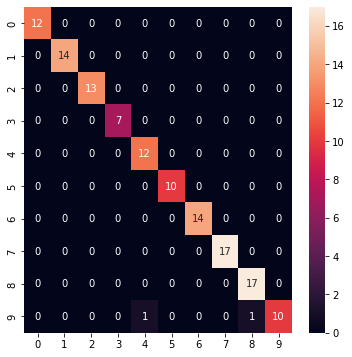

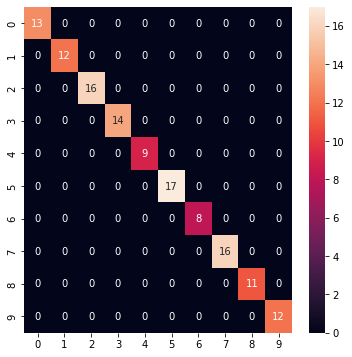

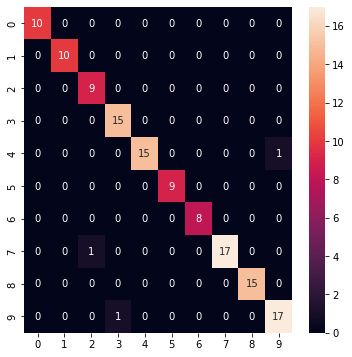

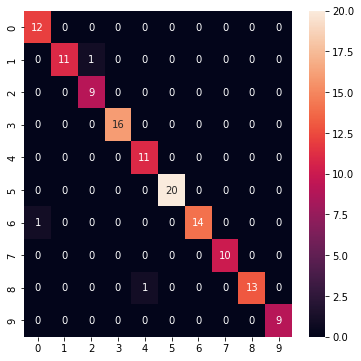

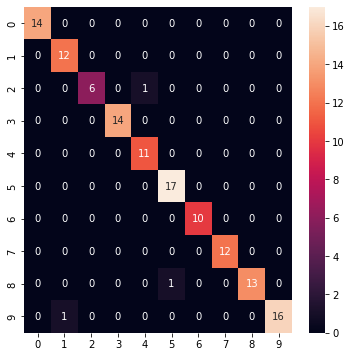

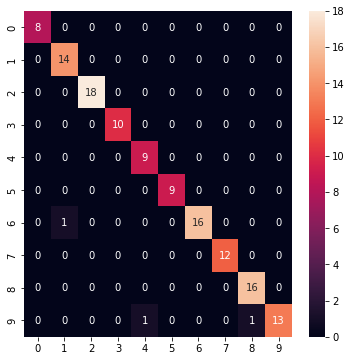

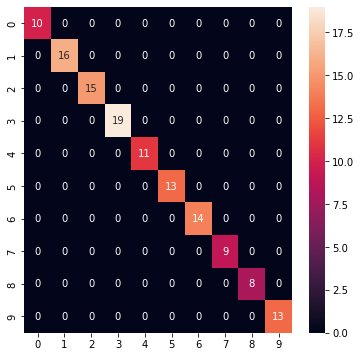

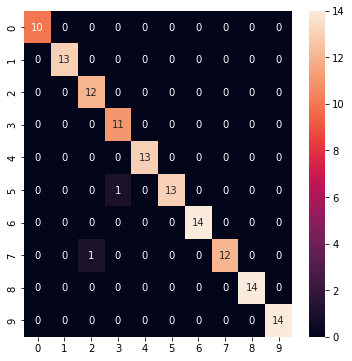

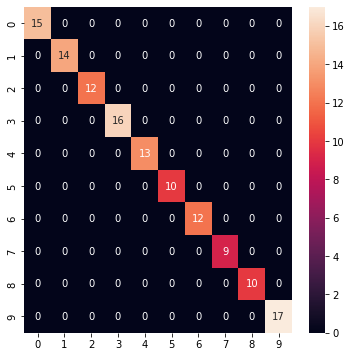

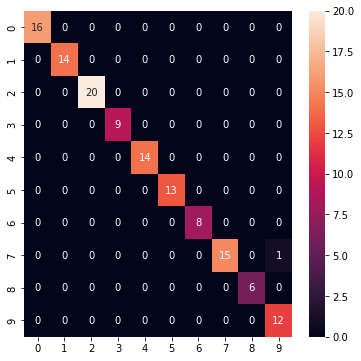

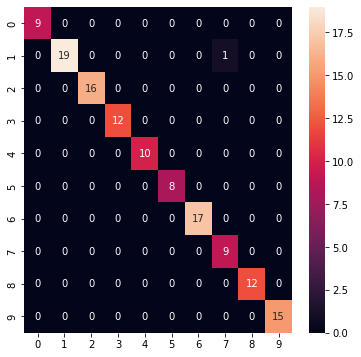

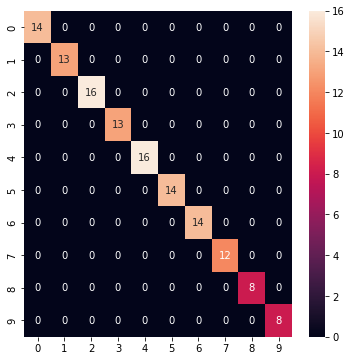

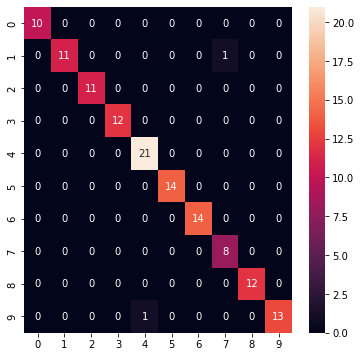

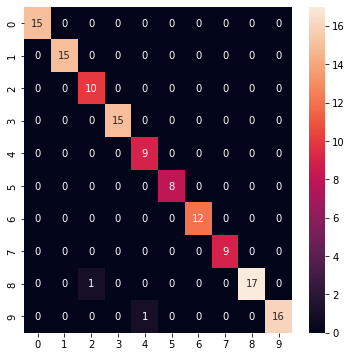

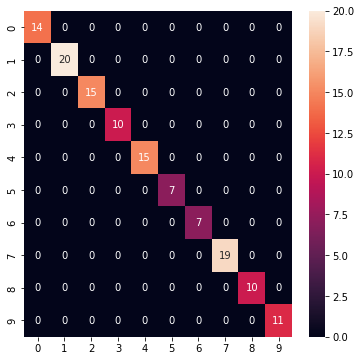

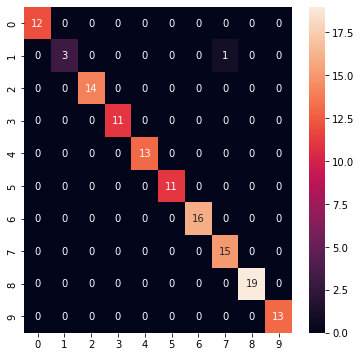

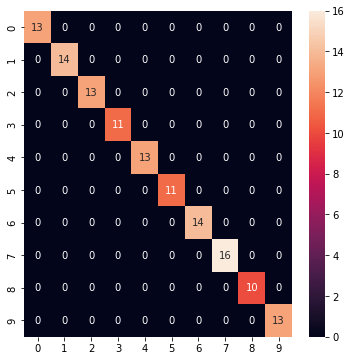

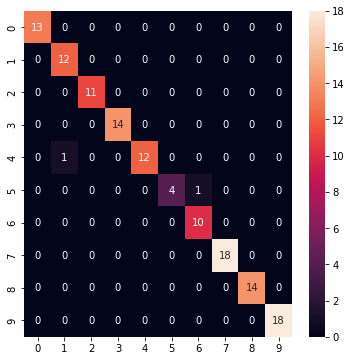

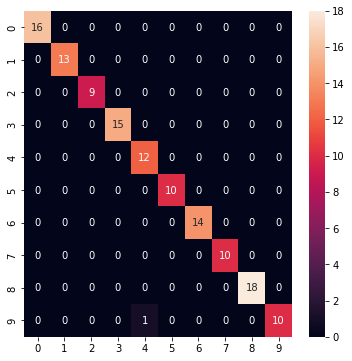

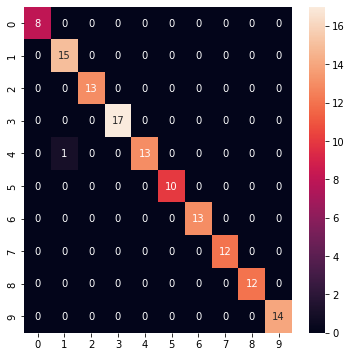

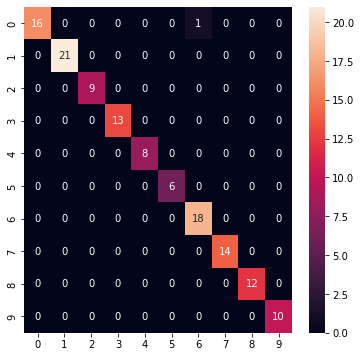

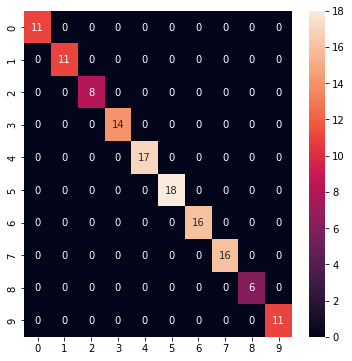

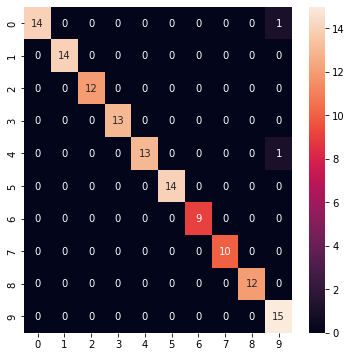

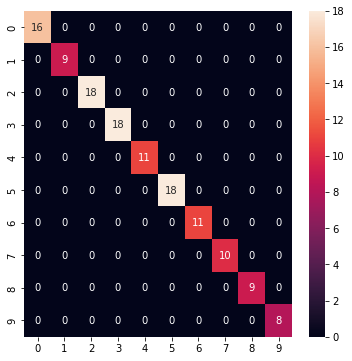

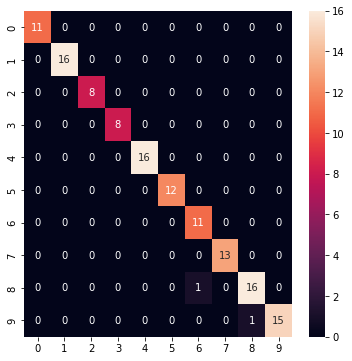

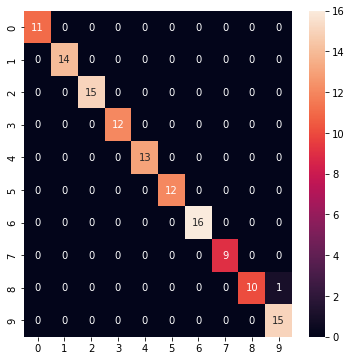

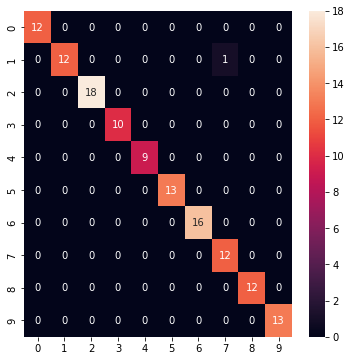

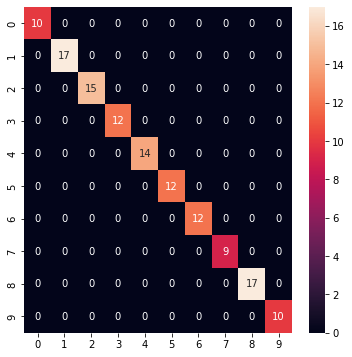

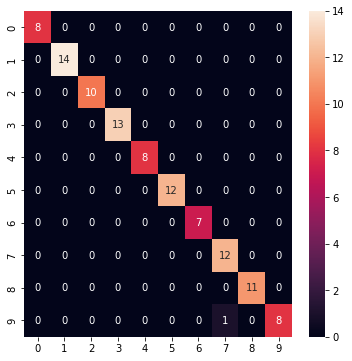

In [5]:
train(
    model,
    config['scheduler']['epochs'],
    train_dataloader,
    val_dataloader,
    optimizer,
    loss_function,
    scheduler,
    train_metrics,
    val_metrics,
    config['evaluation']['period'],
    config['autosave']['period'],
    logs_root="logs",
    checkpoints_root="checkpoints",
    device=None,
)

## Restore the model, evaluate it on the test subset

In [6]:
import pandas as pd

TEST_DATA_PATH = os.path.join("data", "test.csv")
df = pd.read_csv(TEST_DATA_PATH)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from digits_recognizer import InferenceModel

MODEL_CHECKPOINT = 'checkpoints/07-Aug-2022-14-51-48/state_dict_epoch_4'

loaded_model = build_model(config['model']['type'])
loaded_model.load_state_dict(torch.load(MODEL_CHECKPOINT))
inference_model = InferenceModel(
    model=loaded_model,
    preprocessor=build_preprocessor(config['model']['preprocessing']),
    device=get_available_device(),
)

Platform: Darwin
Release: 21.5.0
MPS available: True
CUDA available: False
Selected device: mps


In [10]:
from collections import defaultdict


dataset = MNISTDataset(TEST_DATA_PATH)
ans = defaultdict(list)

with tqdm(total=len(dataset)) as pbar:
    for sample_idx in range(len(dataset)):
        ans["ImageId"].append(sample_idx + 1)
        image, _ = dataset[sample_idx]
        prediction = inference_model.predict(image)
        ans["Label"].append(prediction)
        pbar.update(1)

ans_df = pd.DataFrame.from_dict(ans)
ans_df.head()

100%|██████████| 28000/28000 [13:59<00:00, 33.35it/s]


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [11]:
ans_df.to_csv("ans.csv", index=False)